In [1]:
from transformers import pipeline
from PIL import Image
import requests
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
#sentiment analysis

# Allocate a pipeline for sentiment-analysis
classifier = pipeline('sentiment-analysis')
prediction = classifier('We are very happy to introduce pipeline to the transformers repository.')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [3]:
print(prediction)

[{'label': 'POSITIVE', 'score': 0.9996980428695679}]


In [4]:
#object detection
url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/coco_sample.png"

In [5]:
image_data = requests.get(url, stream=True).raw
image = Image.open(image_data)

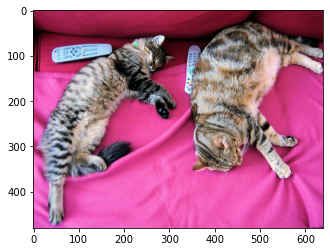

In [6]:
plt.imshow(image)

In [7]:
#object detection pipeline
detector = pipeline('object-detection')
prediction = detector(image)

No model was supplied, defaulted to facebook/detr-resnet-50 and revision 2729413 (https://huggingface.co/facebook/detr-resnet-50).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [8]:
print(prediction)

[{'score': 0.9982202649116516, 'label': 'remote', 'box': {'xmin': 40, 'ymin': 70, 'xmax': 175, 'ymax': 117}}, {'score': 0.9960021376609802, 'label': 'remote', 'box': {'xmin': 333, 'ymin': 72, 'xmax': 368, 'ymax': 187}}, {'score': 0.9954743981361389, 'label': 'couch', 'box': {'xmin': 0, 'ymin': 1, 'xmax': 639, 'ymax': 473}}, {'score': 0.99880051612854, 'label': 'cat', 'box': {'xmin': 13, 'ymin': 52, 'xmax': 314, 'ymax': 470}}, {'score': 0.9986783862113953, 'label': 'cat', 'box': {'xmin': 345, 'ymin': 23, 'xmax': 640, 'ymax': 368}}]


In [9]:
from torchvision.utils import draw_bounding_boxes
import torch

In [10]:
boxes = []
for pred in prediction:
    boxes.append(list(pred['box'].values()))
    

In [11]:
boxes = torch.tensor(boxes)

In [12]:
image_np = np.array(image)
image_torch = torch.from_numpy(image_np)
image_torch = image_torch.permute(2, 0, 1)

In [13]:
result = draw_bounding_boxes(image_torch, boxes, width=5)

In [14]:
import torch
import numpy as np
import matplotlib.pyplot as plt

import torchvision.transforms.functional as F


plt.rcParams["savefig.bbox"] = 'tight'


def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

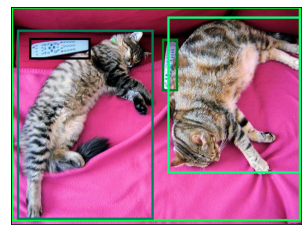

In [15]:
show(result)

In [16]:
from datasets import load_dataset

In [17]:
dataset = load_dataset("yelp_review_full")

Reusing dataset yelp_review_full (/home/popo/.cache/huggingface/datasets/yelp_review_full/yelp_review_full/1.0.0/e8e18e19d7be9e75642fc66b198abadb116f73599ec89a69ba5dd8d1e57ba0bf)


  0%|          | 0/2 [00:00<?, ?it/s]

In [18]:
dataset

DatasetDict({
    train: Dataset({
        features: ['label', 'text'],
        num_rows: 650000
    })
    test: Dataset({
        features: ['label', 'text'],
        num_rows: 50000
    })
})

In [19]:
dataset["train"][100]

{'label': 0,
 'text': 'My expectations for McDonalds are t rarely high. But for one to still fail so spectacularly...that takes something special!\\nThe cashier took my friends\'s order, then promptly ignored me. I had to force myself in front of a cashier who opened his register to wait on the person BEHIND me. I waited over five minutes for a gigantic order that included precisely one kid\'s meal. After watching two people who ordered after me be handed their food, I asked where mine was. The manager started yelling at the cashiers for \\"serving off their orders\\" when they didn\'t have their food. But neither cashier was anywhere near those controls, and the manager was the one serving food to customers and clearing the boards.\\nThe manager was rude when giving me my order. She didn\'t make sure that I had everything ON MY RECEIPT, and never even had the decency to apologize that I felt I was getting poor service.\\nI\'ve eaten at various McDonalds restaurants for over 30 years. 

In [20]:
food = load_dataset("food101", split="train[:5000]")

Using custom data configuration default


Generating train split:   0%|          | 0/75750 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/25250 [00:00<?, ? examples/s]

Dataset food101 downloaded and prepared to /home/popo/.cache/huggingface/datasets/food101/default/0.0.0/7cebe41a80fb2da3f08fcbef769c8874073a86346f7fb96dc0847d4dfc318295. Subsequent calls will reuse this data.


In [21]:
food

Dataset({
    features: ['image', 'label'],
    num_rows: 5000
})